# HW6

### 3. Random Forest and One-Class SVM for Email Spam Classifier
Your task for this question is to build a spam classifier using the UCR email spam dataset https: //archive.ics.uci.edu/ml/datasets/Spambase came from the postmaster and individuals who had filed spam. Please download the data from that website.   

The collection of non-spam emails came from filed work and personal emails, and hence the word ’george’ and the area code ’650’ are indicators of non-spam. These are useful when constructing a personalized spam filter. You are free to choose any package for this homework. Note: there may be some missing values. You can just fill in zero.  

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

In [2]:
# Import data
data =  pd.read_csv('spambase/spambase.data', sep=",", header=None)
data.columns = ['word_freq_make','word_freq_address','word_freq_all','word_freq_3d','word_freq_our','word_freq_over',
'word_freq_remove','word_freq_internet','word_freq_order','word_freq_mail','word_freq_receive','word_freq_will',
'word_freq_people','word_freq_report','word_freq_addresses','word_freq_free','word_freq_business','word_freq_email',
'word_freq_you','word_freq_credit','word_freq_your','word_freq_font','word_freq_000','word_freq_money','word_freq_hp',
'word_freq_hpl','word_freq_george','word_freq_650','word_freq_lab','word_freq_labs','word_freq_telnet','word_freq_857',
'word_freq_data','word_freq_415','word_freq_85','word_freq_technology','word_freq_1999','word_freq_parts','word_freq_pm',
'word_freq_direct','word_freq_cs','word_freq_meeting','word_freq_original','word_freq_project','word_freq_re','word_freq_edu',
'word_freq_table','word_freq_conference','char_freq_;','char_freq_(','char_freq_[','char_freq_!','char_freq_$',
'char_freq_#','capital_run_length_average','capital_run_length_longest','capital_run_length_total','spam']
data.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


**a. Randomly shuffle the data and partition to use 80% for training and the remaining 20% for testing. Build a CART model with the training data and visualize the fitted classification.**

In [3]:
# Split data into test/train
X = data.iloc[:,0:57]
y = data.iloc[:,57:58]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=4624)

In [4]:
# https://scikit-learn.org/stable/modules/tree.html
clf = DecisionTreeClassifier(min_samples_leaf = 100)
clf = clf.fit(X_train, y_train.values.ravel())

# Predict labels
y_pred_train_tree = clf.predict(X_train)
y_pred_test_tree = clf.predict(X_test)

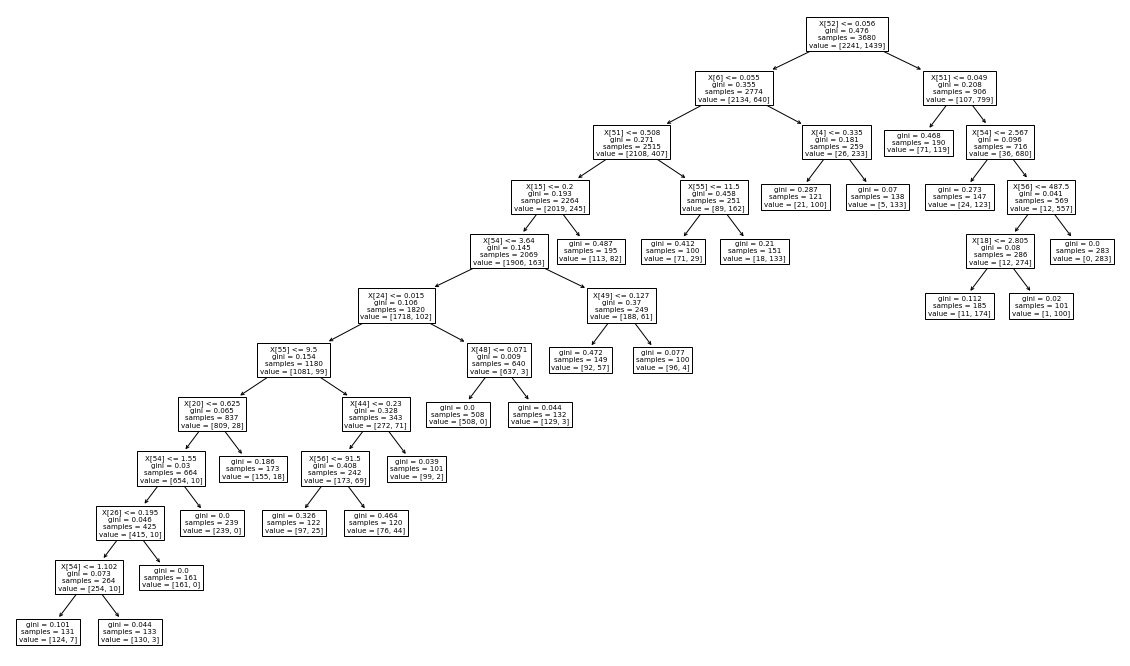

In [5]:
# Plot the tree
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html#sklearn.tree.plot_tree
fig, ax = plt.subplots(figsize=(20, 12))
plot_tree(clf)
plt.savefig('Q3a_Full_Tree.jpg')

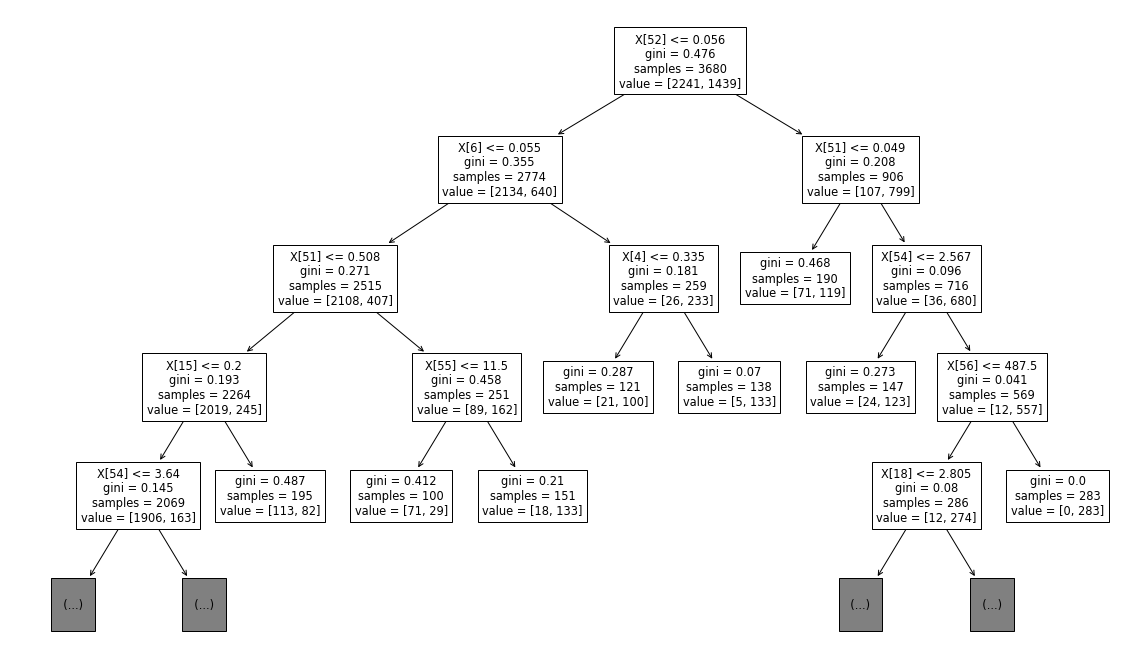

In [6]:
# Plot first 5 levels of tree
fig, ax = plt.subplots(figsize=(20, 12))
plot_tree(clf, max_depth = 4)
plt.savefig('Q3a_Partial_Tree.jpg')

**b. Now also build a random forest model. Use your train/test split from part a). Compare and report the test error for your classification tree and random forest models on testing data. Plot the curve of test error (total misclassification error rate) versus the number of trees for the random forest, and plot the test error for the CART model (which should be a constant with respect to the number of trees).**  

In [7]:
from sklearn.ensemble import RandomForestClassifier
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
clf_rf = RandomForestClassifier(min_samples_leaf = 100, random_state=0)
clf_rf.fit(X_train, y_train.values.ravel())

y_pred_train_rf = clf_rf.predict(X_train)
y_pred_test_rf = clf_rf.predict(X_test)

In [8]:
# Generate test error
from sklearn.metrics import accuracy_score
tree_error = 1 - accuracy_score(y_test, y_pred_test_tree)
rf_error = 1 - accuracy_score(y_test, y_pred_test_rf)

tree_error, rf_error

(0.11943539630836053, 0.09880564603691644)

In [9]:
# Plot Test Error vs Number of Trees for Random Forest
min_n = 1
max_n = 200

n = []
rf_error = []

# Loop through different number of trees
for i in np.arange(min_n, max_n + 1,2):
#     print(i)
    clf_rf_plt = RandomForestClassifier(min_samples_leaf = 100, random_state=0, n_estimators=i)
    clf_rf_plt.fit(X_train, y_train.values.ravel())
    y_pred_test_rf_plt = clf_rf_plt.predict(X_test)
    rf_plt_error = 1 - accuracy_score(y_test, y_pred_test_rf_plt)
    n.append(i)
    rf_error.append(rf_plt_error)

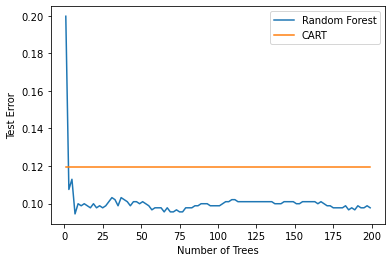

In [10]:
cart_error = np.ones(len(n))*tree_error

plt.plot(n,rf_error)
plt.plot(n,cart_error)
plt.legend(['Random Forest', 'CART'], loc='upper right')
plt.ylabel('Test Error')
plt.xlabel('Number of Trees')
plt.savefig('Q3b_Error_Rate.jpg')

**c. Now we will use a one-class SVM approach for spam filtering. Use your train/test split from part a). Extract all non-spam emails from the training block (80% of data you have selected) to build the one-class kernel SVM using RBF kernel (you can turn the kernel bandwidth to achieve good performance). Then apply it on the 20% of data reserved for testing (thus this is a novelty detection situation), and report the total misclassification error rate on this testing data.**

In [11]:
X_train_nspam = X_train[y_train['spam']==0]

In [12]:
from sklearn.svm import OneClassSVM
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.OneClassSVM.html

clf_svm = OneClassSVM(kernel='rbf', gamma='auto').fit(X_train_nspam)
y_pred_svm = clf_svm.predict(X_test)
y_pred_svm[y_pred_svm==1]=0
y_pred_svm[y_pred_svm==-1]=1

svm_error = 1 - accuracy_score(y_test, y_pred_svm)

svm_error

0.3669923995656895

### 4. Locally Weighted Linear Regression and Bias-Variance Tradeoff
Consider a data set with n data points ($x_i,y_i$) following the following linear model:  
$y_i=\beta^{*T}x_u+\epsilon_i$  
where $\epsilon_i$ ~ $N(0, \sigma_i^2)$ are independent (but not identically distributed) Gaussian noise with zero mean and variance $\sigma_i^2$.  

**a. Show that the ridge regression which introduces a squared l2 norm penalty on the
parameter in the maximum likelihood estimate of β can be written as follows:
$\hat\beta(\lambda) = argmin_\beta \{X(\beta-y)^TWX(\beta-y)+\lambda||\beta||_2^2\}$ for diagonal matrix W, matrix X and vector y.
Please also explain how W, X and y are defined in terms of $\sigma_i^2$, $x_i$ and $y_i$.**  

*I'm following steps from Prof. Xie's office hour from March 29.*

Start with the log likelihood function, given that $y_i$ ~ $N(B^{*T}x_i, \sigma_i^2 )$:  
$\Sigma_{i=1}^n log(f(y_i|\beta))$  
= $\Sigma_{i=1}^n log(\frac{1}{\sqrt{2\pi\sigma_i^2}} e^{\frac{-(y_i-\beta^Tx_i)^2}{2\sigma_i^2}} )$  
$\longrightarrow l(\beta) = \Sigma_{i=1}^n \frac{-1}{2}log(2\pi\sigma_i^2) - \Sigma_{i=1}^n \frac{(y_i-\beta^Tx_i)^2}{2\sigma_i^2}$  

To get the maximum likelihood estimate of $\beta$, we will add the ridge regression penalty and take the derivative of $l(\beta)$ and set to 0. We can drop the first term because it doesn't depend on $\beta$.  

$max_\beta\;l(\beta) = - \Sigma_{i=1}^n \frac{(y_i-\beta^Tx_i)^2}{2\sigma_i^2} + \lambda ||\beta||_2^2$  
$\longrightarrow min_\beta\;l(\beta) = \Sigma_{i=1}^n \frac{(y_i-\beta^Tx_i)^2}{2\sigma_i^2} + \lambda ||\beta||_2^2$  
Let $y = \begin{bmatrix} y_1 \\ ... \\ y_n \end{bmatrix}, X = \begin{bmatrix} x_1^T \\ ... \\ x_n^T \end{bmatrix}$ and $X\beta = \begin{bmatrix} x_1^T\beta \\ ... \\ x_n^T\beta \end{bmatrix}$ and W = covariance matrix = $\begin{bmatrix} \frac{1}{2\sigma_1^2}...0 \\ ... \\ 0...\frac{1}{2\sigma_n^2} \end{bmatrix}$


Then $\Sigma_{i=1}^n \frac{(y_i-\beta^Tx_i)^2}{2\sigma_i^2} \equiv (y-X\beta)^TW(y-X\beta)$  
and the expression $min_\beta\;l(\beta) = \Sigma_{i=1}^n \frac{(y_i-\beta^Tx_i)^2}{2\sigma_i^2} + \lambda ||\beta||_2^2 \equiv min_\beta\;l(\beta) = (y-X\beta)^TW(y-X\beta) + \lambda ||\beta||_2^2$

**b. Find the closed-form solution for β(λ) and its distribution conditioning on {$x_i$}.**  

To find closed form, we must take the derivative of $l(\beta) = (y-X\beta)^TW(y-X\beta) + \lambda ||\beta||_2^2$ and set to 0.  

$\frac{\partial}{\partial \beta} (y-X\beta)^TW(y-X\beta) + \lambda ||\beta||_2^2 = -2WX^T(y-X\beta) + 2\lambda\beta$  
$0 = -2WX^Ty + 2WX^TX\beta + 2\lambda\beta$  
$2WX^Ty = \beta(2WX^TX + 2\lambda)$  
$\longrightarrow \hat\beta = \frac{WX^Ty}{WX^TX + \lambda}$  

Finding the distribution:  
$E[\hat\beta] = E[\frac{WX^Ty}{WX^TX + \lambda}] = \frac{WX^T}{WX^TX + \lambda}*E[y] = \frac{WX^T}{WX^TX + \lambda}* (X\beta^*)$  
$Var(\hat\beta) = Var(\frac{WX^Ty}{WX^TX + \lambda}) = \frac{WX^T}{WX^TX + \lambda}*Var(y) = \frac{WX^T}{WX^TX + \lambda}\sigma^2$, where $\sigma^2 = \begin{bmatrix} \sigma_1^2 \\ ... \\ \sigma_n^2 \end{bmatrix}$  

Thus, $\hat\beta$ \~ $N(\frac{WX^TX\beta^*}{WX^TX + \lambda}, \frac{WX^T\sigma^2}{WX^TX + \lambda})$.

**c. Derive the bias as a function of λ and some fixed test point x.**  

Bias = $E[\hat y] - y = E[X\hat\beta] - X\beta^*$  
$= E[X\frac{WX^TX\beta^*}{WX^TX + \lambda}] - X\beta^*$  
$= X\frac{WX^TX\beta^*}{WX^TX + \lambda} - X\beta^*$  
$= \frac{XWX^TX\beta^*- X\beta^*(WX^TX + \lambda)}{WX^TX + \lambda}$   
$=  \frac{XWX^TX\beta^*- X\beta^*WX^TX - X\beta^*\lambda}{WX^TX + \lambda} $  
$= \frac{- X\beta^*\lambda}{WX^TX + \lambda} $


**d. Derive the variance term as a function of λ and some fixed text point x.**  

Variance = $Var(\hat y) = Var(x^T\hat\beta) = x^TVar(\hat\beta)x$  
$= \frac{x^TWX^T\sigma^2x}{WX^TX + \lambda}$


**e. Now assuming the data are one-dimensional, we provide a toy training dataset of two samples: $x_1$ = 1.5 and $x_2$ = 1, and the test sample x = 1.7. The true parameter $\beta_0^*$ = 1, $\beta_1^*$ = 1, the noise variance is given by $\sigma_1^2$ = 2, $\sigma_2^2$ = 1. Plot the MSE (Bias square plus variance) as a function of the regularization parameter λ.**  

$X = \begin{bmatrix} 1.5 \\ 1 \end{bmatrix}, \;  \beta^* = \begin{bmatrix} 1 \\ 1 \end{bmatrix}, \; 
W = \begin{bmatrix} \frac{1}{2\sigma_1^2} & 0 \\ 0 & \frac{1}{2\sigma_2^2}  \end{bmatrix}
= \begin{bmatrix} \frac{1}{4} & 0 \\ 0 & \frac{1}{2}  \end{bmatrix}, \;
\sigma^2 = \begin{bmatrix} \sigma_1^2 \\ \sigma_2^2 \end{bmatrix} = \begin{bmatrix} 2 \\ 1 \end{bmatrix}$

$MSE = Bias^2+ Variance = (\frac{- X\beta^*\lambda}{WX^TX + \lambda})^2 + \frac{x^TWX^T\sigma^2x}{WX^TX + \lambda}$  

*I know that my derivations are not correct because I cannot get a scalar value from my bias and variance calculations. For the sake of this problem and to generate the graphs, I will plot the spectral norm of MSE, bias and variance.* 

In [19]:
from scipy.linalg.interpolative import estimate_spectral_norm

def get_metrics(l, x_test):
    X = np.array([[1], [x_test]])
    beta = np.array([[1, 1]])
    W = np.array([[1/4,0 ], [0,1/2 ]])
    sigma = np.array([[2], [1]])
    l = l*np.identity(2)    
    
    bias = (-X.T@beta.T + l)/(W@X@X.T+l)
    var = (X.T@W@X@sigma.T@X)/(W@X@X.T + l)
    mse = bias**2 + var
    
    return estimate_spectral_norm(bias**2), estimate_spectral_norm(var), estimate_spectral_norm(mse)

In [20]:
# Generate graph data
lambda_vals = np.arange(0,5,0.1)

bias_sq = []
variance = []
mse = []

for l in lambda_vals:
    res = get_metrics(l, 1.7)
    bias_sq.append(res[0])
    variance.append(res[1])
    mse.append(res[2])   

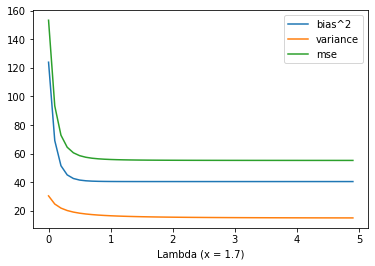

In [21]:
plt.plot(lambda_vals,bias_sq)
plt.plot(lambda_vals,variance)
plt.plot(lambda_vals,mse)
plt.legend(['bias^2', 'variance', 'mse'], loc='upper right')
plt.xlabel('Lambda (x = 1.7)')
plt.savefig('Q4e_Output.jpg')

**f. Now change the test sample to be a x = 2.5, and keep everything else the same as in the previous question. Plot the MSE (Bias square plus variance) as a function of the regularization parameter λ, and comment on the difference from the previous result.**

In [22]:
# Generate graph data
lambda_vals = np.arange(0,5,0.1)

bias_sq = []
variance = []
mse = []

for l in lambda_vals:
    res = get_metrics(l, 2.5)
    bias_sq.append(res[0])
    variance.append(res[1])
    mse.append(res[2])   

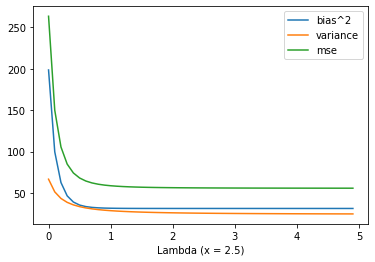

In [23]:
plt.plot(lambda_vals,bias_sq)
plt.plot(lambda_vals,variance)
plt.plot(lambda_vals,mse)
plt.legend(['bias^2', 'variance', 'mse'], loc='upper right')
plt.xlabel('Lambda (x = 2.5)')
plt.savefig('Q4f_Output.jpg')